In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.style.use("seaborn-v0_8")


In [19]:
# Load dataset (make sure the CSV file is in the same folder as the notebook)
df = pd.read_csv("/content/drive/MyDrive/Task 3/2021-2022 Football Team Stats.csv", encoding="latin1", delimiter=";")

# Display first 5 rows
df.head()
df.shape

(98, 20)

In [20]:
# Display dataset info and column names
print(df.info())
print("\nColumns:", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Attendance       9

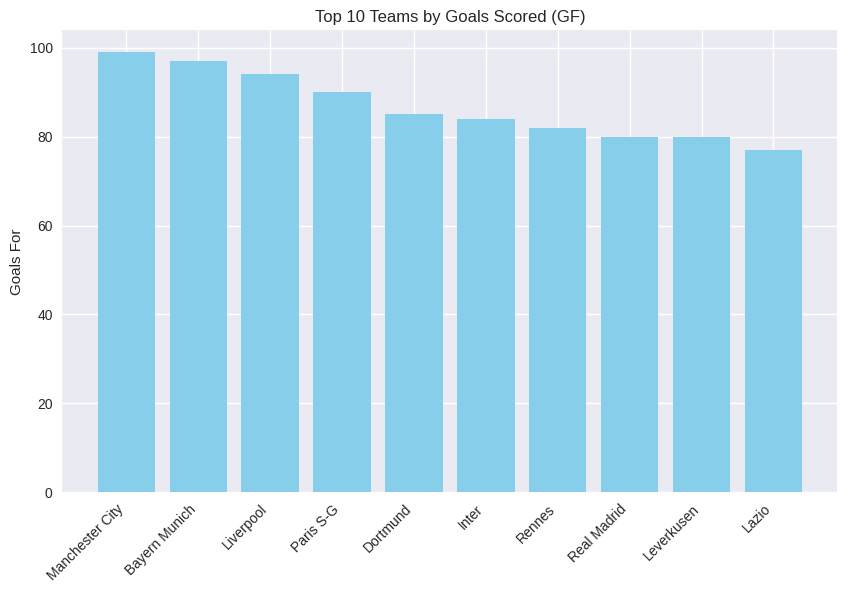

In [21]:
# Top 10 teams by Goals For (GF)
top_gf = df.nlargest(10, "GF")

plt.figure(figsize=(10,6))
plt.bar(top_gf["Squad"], top_gf["GF"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Teams by Goals Scored (GF)")
plt.ylabel("Goals For")
plt.show()

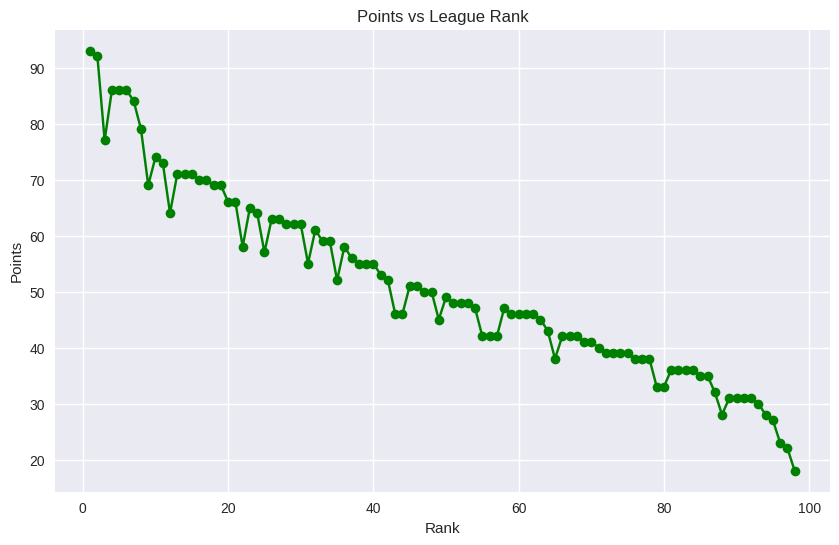

In [22]:
# Points vs Rank
plt.figure(figsize=(10,6))
plt.plot(df["Rk"], df["Pts"], marker="o", color="green")
plt.title("Points vs League Rank")
plt.xlabel("Rank")
plt.ylabel("Points")
plt.show()

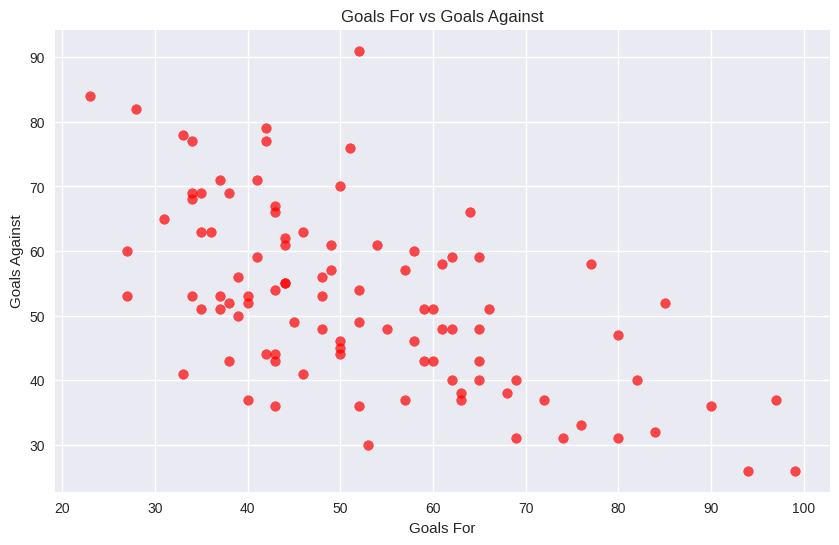

In [23]:
# Goals For vs Goals Against
plt.figure(figsize=(10,6))
plt.scatter(df["GF"], df["GA"], alpha=0.7, c="red")
plt.title("Goals For vs Goals Against")
plt.xlabel("Goals For")
plt.ylabel("Goals Against")
plt.show()

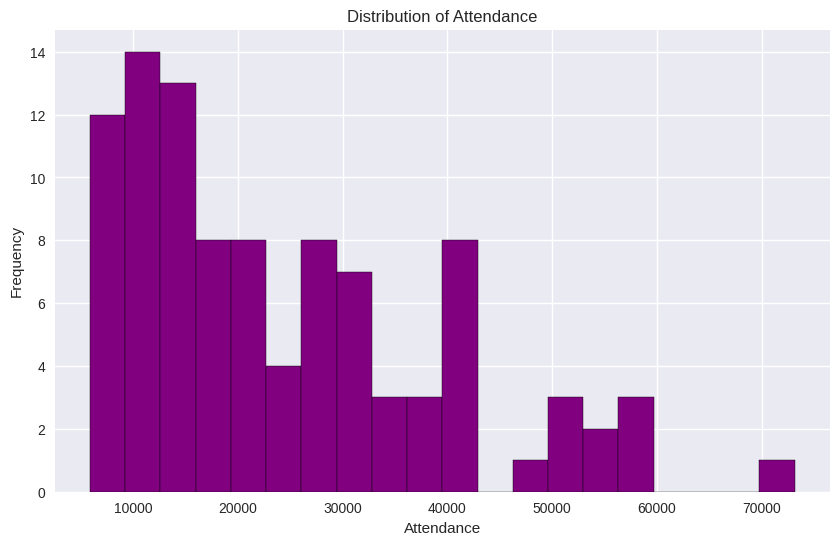

In [24]:
# Attendance Distribution
plt.figure(figsize=(10,6))
plt.hist(df["Attendance"].dropna(), bins=20, color="purple", edgecolor="black")
plt.title("Distribution of Attendance")
plt.xlabel("Attendance")
plt.ylabel("Frequency")
plt.show()

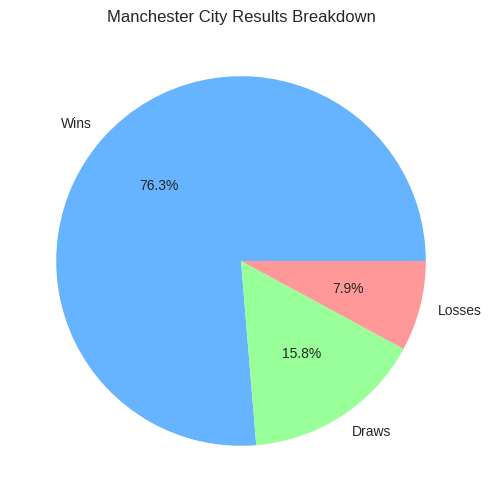

In [25]:
# Wins/Draws/Losses for Manchester City
team = df[df["Squad"] == "Manchester City"].iloc[0]

plt.figure(figsize=(6,6))
plt.pie([team["W"], team["D"], team["L"]],
        labels=["Wins", "Draws", "Losses"],
        autopct="%1.1f%%",
        colors=["#66b3ff", "#99ff99", "#ff9999"])
plt.title("Manchester City Results Breakdown")
plt.show()

/tmp/ipython-input-2195602597.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Country", y="GF", estimator="mean", ci=None, palette="Blues_d")
/tmp/ipython-input-2195602597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Country", y="GF", estimator="mean", ci=None, palette="Blues_d")


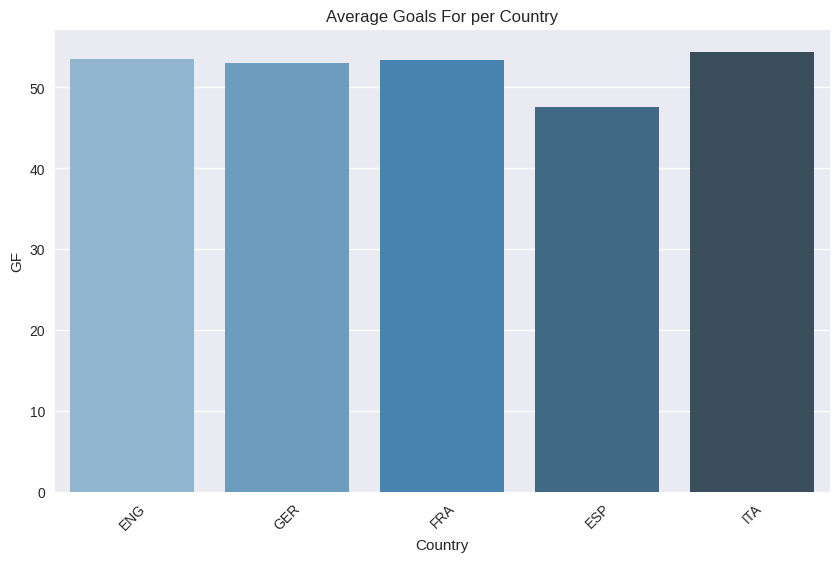

In [26]:
# Average Goals For per Country
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Country", y="GF", estimator="mean", ci=None, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Average Goals For per Country")
plt.show()

/tmp/ipython-input-2479997189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y="Pts", palette="Set2")


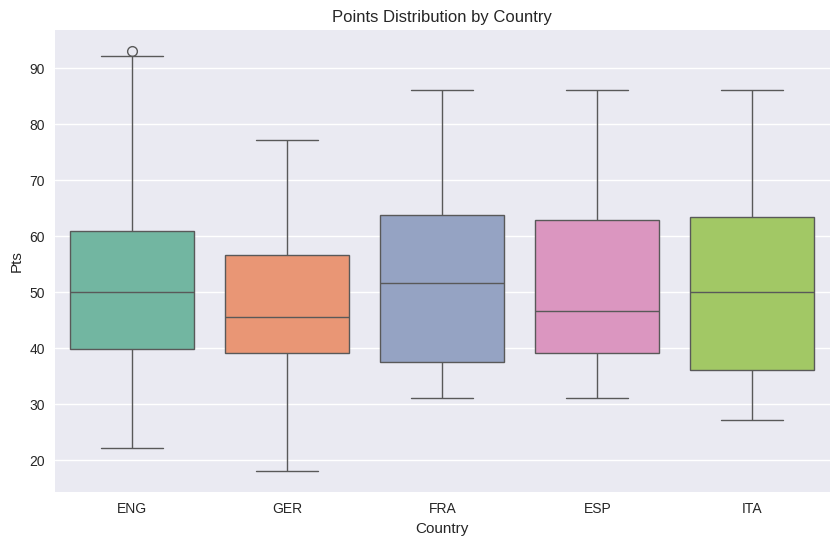

In [34]:
# Points Distribution by Country
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Country", y="Pts", palette="Set2")
plt.xticks()
plt.title("Points Distribution by Country")
plt.show()

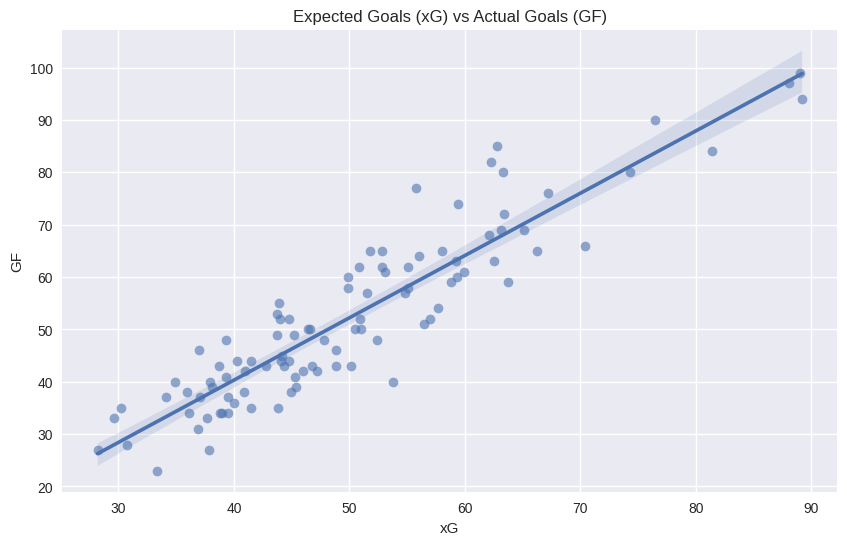

In [28]:
# xG vs Goals For
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="xG", y="GF", scatter_kws={"alpha":0.6})
plt.title("Expected Goals (xG) vs Actual Goals (GF)")
plt.show()

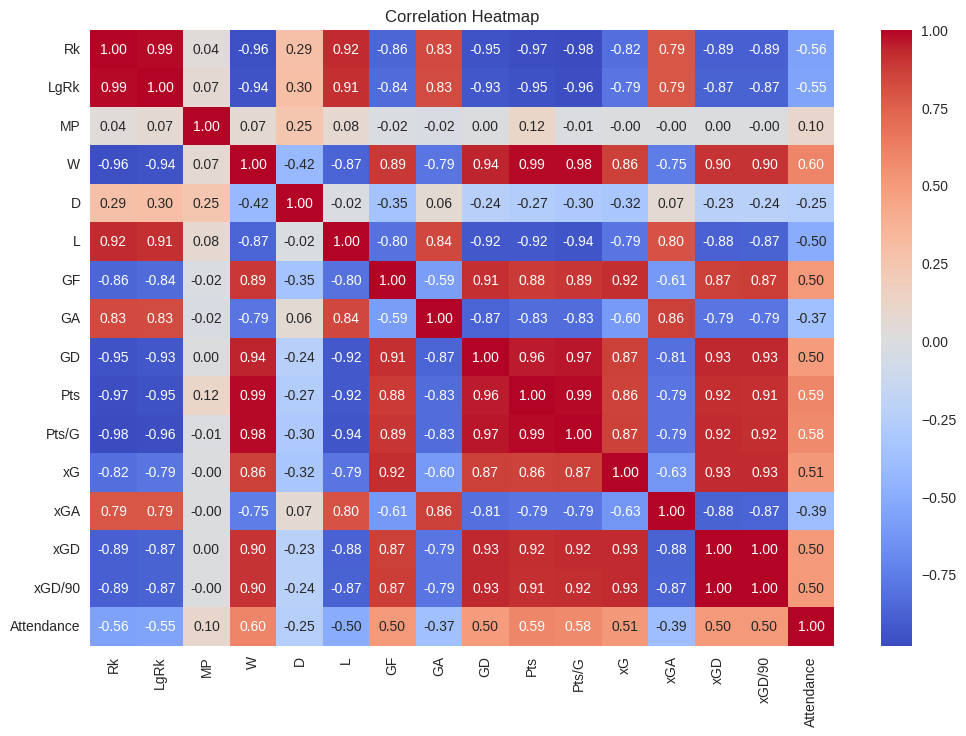

In [29]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-2767730799.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Country", y="Attendance", estimator="mean", ci=None, palette="viridis")
/tmp/ipython-input-2767730799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Country", y="Attendance", estimator="mean", ci=None, palette="viridis")


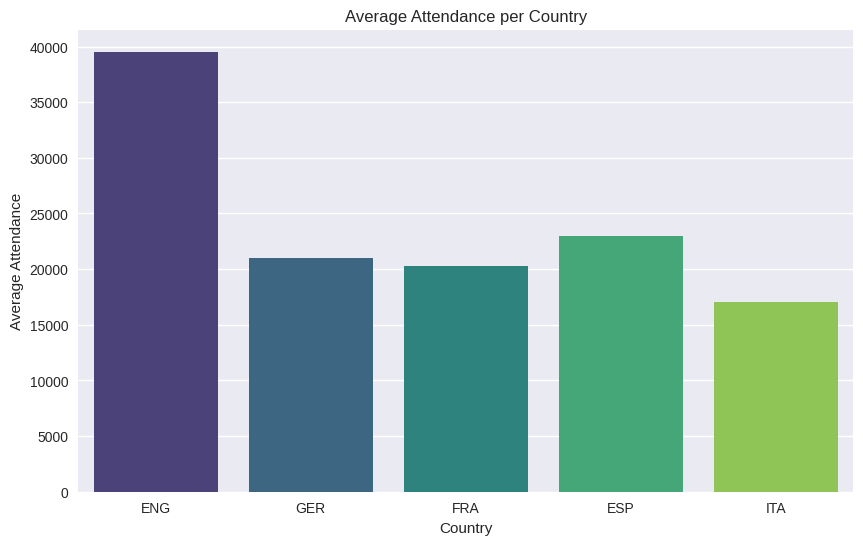

In [32]:
# Average Attendance per Country
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Country", y="Attendance", estimator="mean", ci=None, palette="viridis")
plt.xticks
plt.title("Average Attendance per Country")
plt.ylabel("Average Attendance")
plt.show()

/tmp/ipython-input-154080088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Country", y="Attendance", palette="muted")


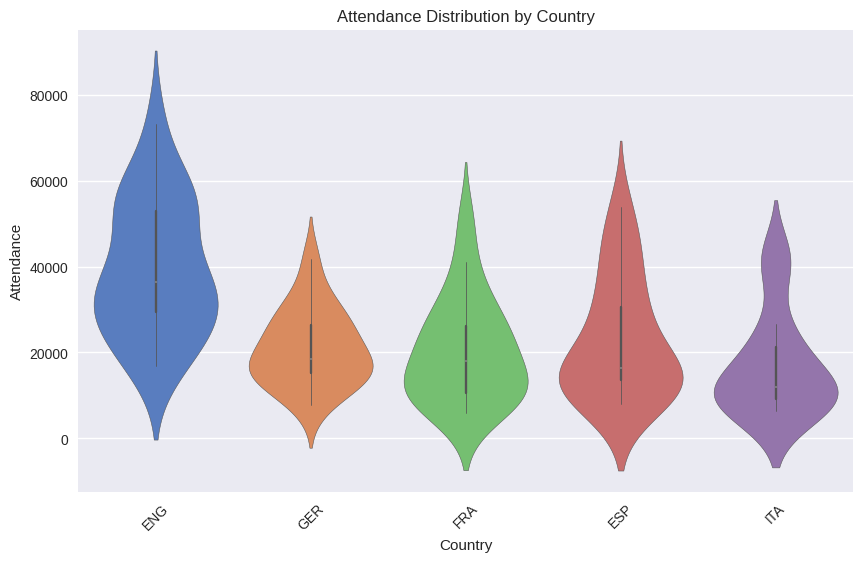

In [33]:
# Attendance Distribution by Country
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Country", y="Attendance", palette="muted")
plt.xticks(rotation=45)
plt.title("Attendance Distribution by Country")
plt.show()